# **A Classification Model of Restaurant Reviews through Natural Language Processing**
_____

Author: **Daniel Eduardo López**

#####<a href="https://www.linkedin.com/in/daniel-eduardo-lopez"> LinkedIn </a> 

#####<a href="https://github.com/DanielEduardoLopez"> GitHub </a>



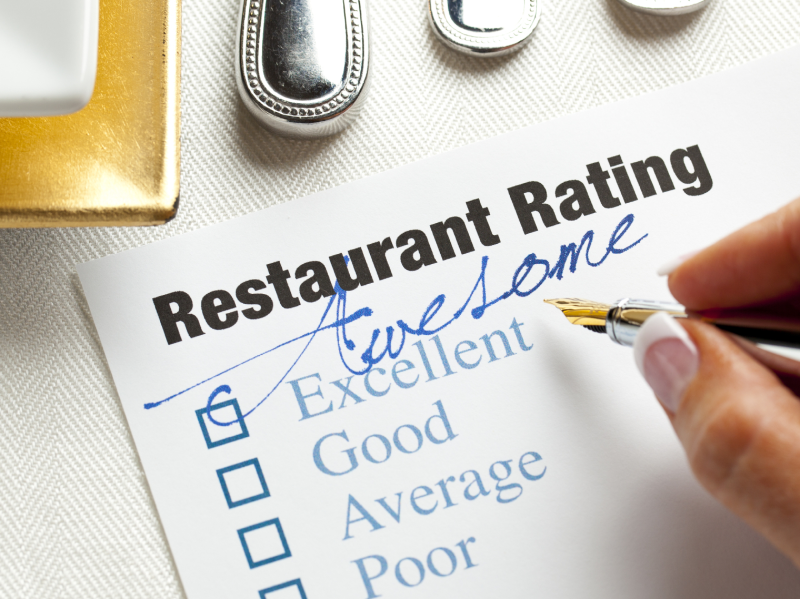

<a href="https://media.npr.org/assets/img/2012/09/10/restaurant-review-1f1ede4d672918ad61b6072191a48560445184ff.jpg"> Image Source </a>

### **1. Introduction**
**Text data** consists of phrases and sentences composed of words (Müller & Guido, 2016) that comes from a Natural Language, i.e., English, Spanish, Latin, etc. In this sense, **Natural Language Processing (NLP)** is the area of the computer science and artificial intelligence that deals with the processing and analysis of text data (Rogel-Salazar, 2020). 

The **bag-of-words model** is simple but effective representation of text data in which each word appearing in each text is counted and used to build a sparse matrix suitable to be used with Machine Learning (ML) techniques (Müller & Guido, 2016).

Some of the most common classification algorithms in ML are **Logistic Regression, K-Nearest Neighbors, Support Vector Machines, Naive Bayes, Decision Trees, Random Forests, and XGBoost** (Müller & Guido, 2016; Ponteves, & Ermenko, 2021). 

According to Müller & Guido (2016), **random forests** are among the most popular ML techniques as they have a very good predictive power while reducing the overfitting. However, they are said to perform poorly on sparse datasets; being the linear models a more appropriate option (Müller & Guido, 2016).

In this context, it is desired to select the ML algorithm that is capable to yield the most accurate predictions on the NLP of restaurant reviews based on a bag-of-words model. 

___

### **2. Goal**

To select the best machine learning algorithm for accurately classifying restaurant reviews into positive or negative through Natural Language Processing based on a bag-of-words model. 
___

### **3. Research Question**
Which machine learning algorithm for classifying restaurant reviews into positive or negative through Natural Language Processing based on a bag-of-words model is able to yield the highest accuracy?
___

### **4. Hypothesis**

**Random Forests** is the machine learning algorithm that yields the highest accuracy for classifying restaurant reviews into positive or negative through Natural Language Processing based on a bag-of-words model.
___


### **5. Abridged Methodology**

The methodology of the present study is based on Rollin’s Foundational Methodology for Data Science (Rollins, 2015):

1. **Analytical approach**: Building and evaluation of classification models.
2. **Data requirements**: Reviews of a restaurant and their corresponding labels (0 for negative and 1 for positive).
3. **Data collection**: Data was retrieved from <a href="https://www.kaggle.com/datasets/vigneshwarsofficial/reviews">Kaggle</a>.
4. **Data exploration**: Data was explored with Python 3 and its libraries Numpy, Pandas, Matplotlib and Seaborn.
5. **Data preparation**: Data was cleaned with Python 3 and its libraries Numpy, Pandas, Regular Expressions, and the Natural Language Toolkit.
5. **Data modeling**: First, a bag-of-words model was created from the text data. Then, the dataset was split in training, validation and testing sets. After that, Logistic Regression, K-Nearest Neighbors, Support Vector Machines, Naive Bayes, Decision Trees, Random Forests, and XGBoost algorithms were used to build the models for classificating the restaurant reviews into positive or negative. The hyperparameters for each model were tunned using GridSearchCV or RandomizedSearchCV. Python 3 and its libraries Numpy, Pandas, and Sklearn were utilized for all the modeling steps.
6. **Evaluation**: The algorithms predictions were primarily evaluated through the accuracy rate, the area under the ROC curve (AUC ROC), and the root-mean-square error (RMSE). However, other metrics and tools such as confusion matrices, classification reports, AUC ROC plots, precision, negative predictive value (NPV), sensitivity, specificity, and the F1 score were also used.
___



### **6. Results**



#### **6.1 Data Collection**
As mentioned before, data about restaurant reviews and its corresponding labels was retrieved from <a href="https://www.kaggle.com/datasets/vigneshwarsofficial/reviews">Kaggle</a>.

In [1]:
# Libraries importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting Seaborn Theme
sns.set_theme(context = "notebook", style ="darkgrid")

In [3]:
# Setting Plot format to SVG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [4]:
# Reading data from source
df = pd.read_csv('https://raw.githubusercontent.com/DanielEduardoLopez/RestaurantReviews/61343b57c96225bc512445d33b93ecf9daafef33/Restaurant_Reviews.tsv', sep = "\t", quoting = 3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


#### **6.2 Data Exploration**
The data was explored to identify its general features and characteristics.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Dataset consists of 1000 annotated reviews.

In [6]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [7]:
x = df.Liked.value_counts()
print(f"The amount positive reviews is {x[1]}. And the amount of negative reviews is {x[0]}.")

The amount positive reviews is 500. And the amount of negative reviews is 500.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x7fbd4e053370>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

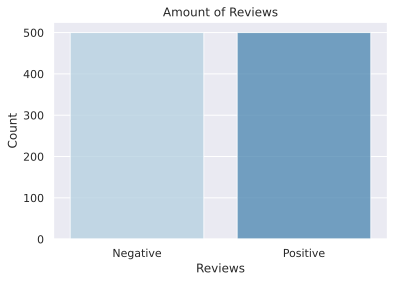

In [8]:
plt.title("Amount of Reviews")
# Bar chart showing amount of both target values
sns.barplot(x.index, x, palette = 'Blues', alpha = 0.75)
# Add label for vertical axis
plt.ylabel("Count")
# Add label for horizontal axis
plt.xlabel("Reviews")
# Add ticks lables for horizontal axis
plt.xticks([0,1], ["Negative", "Positive"])

There is the same amount of Positive and Negative reviews.

In [9]:
# Create a new feature with text lenght, or number of characters
df['Length'] = df['Review'].str.len()
# Create a new feature with number of words
df['Num_words'] = df['Review'].str.split().map(lambda x: len(x))
df.head()

,Review,Liked,Length,Num_words
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [10]:
# Text length summary by target
df.groupby(['Liked']).Length.describe()

,count,mean,std,min,25%,50%,75%,max
Liked,,,,,,,,
0,500.0,60.75,34.224935,11.0,33.00,52.5,84.00,149.0
1,500.0,55.88,30.219464,11.0,32.75,49.5,73.25,148.0


Negative reviews tend to be longer than positive reviews.

Text(0.5, 1.0, 'Positive Review')

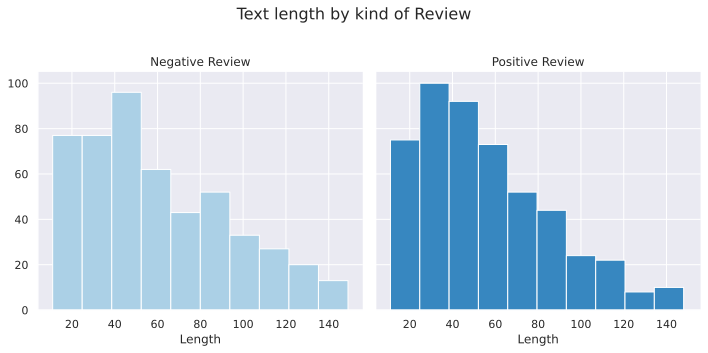

In [11]:
# Facet a plot by target column
g = sns.FacetGrid(df, col = 'Liked', height = 5, hue = 'Liked', palette = 'Blues')
# Plot a histogram chart
g.map(plt.hist, "Length")
# Adjust title position
g.fig.subplots_adjust(top=0.8)
# Add general title
g.fig.suptitle('Text length by kind of Review', fontsize=16)
# Set title to each chart
axes = g.axes.flatten()
axes[0].set_title("Negative Review")
axes[1].set_title("Positive Review")
     

In [12]:
# Number of words summary by target
df.groupby(['Liked']).Num_words.describe()

,count,mean,std,min,25%,50%,75%,max
Liked,,,,,,,,
0,500.0,11.498,6.611916,2.0,6.0,10.0,16.00,32.0
1,500.0,10.290,5.825958,1.0,6.0,9.0,13.25,32.0


Likewise, negative reviews tend to have more words than positive reviews.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Positive Review')

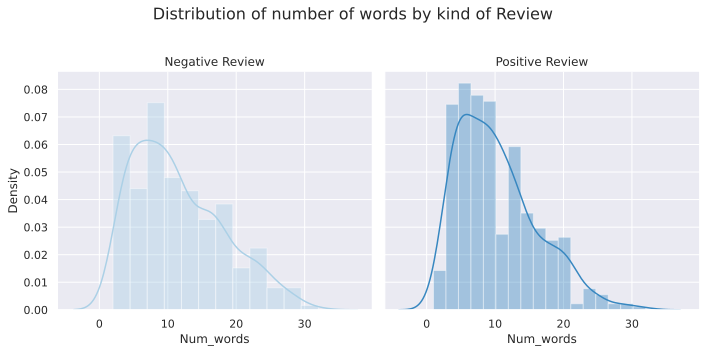

In [13]:
# Facet a plot by target column
g = sns.FacetGrid(df, col = 'Liked', height = 5, hue = 'Liked', palette = 'Blues')
# Plot a histogram chart
g.map(sns.distplot, "Num_words")
# Adjust title position
g.fig.subplots_adjust(top=0.8)
# Add general title
g.fig.suptitle('Distribution of number of words by kind of Review', fontsize=16)
# Set title to each chart
axes = g.axes.flatten()
axes[0].set_title("Negative Review")
axes[1].set_title("Positive Review")   


([<matplotlib.axis.XTick at 0x7fbd490f03a0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

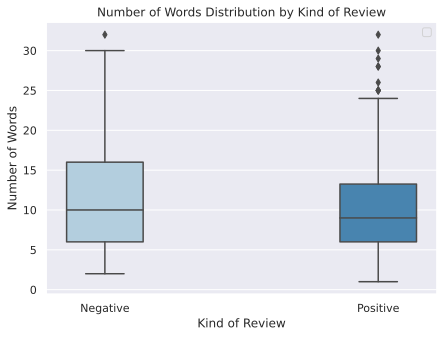

In [14]:
# Boxplot for comparing distribution of number of words by Kind of Review
plt.figure(figsize=(7,5))
# Add title
plt.title("Number of Words Distribution by Kind of Review")
# Boxplot
ax = sns.boxplot(x = "Liked", y = "Num_words", hue="Liked", data = df, palette = 'Blues')
#sns.move_legend(ax, loc = "upper center", facecolor='white')
plt.legend([])
# Add label for vertical axis
plt.ylabel("Number of Words")
# Add label for horizontal axis
plt.xlabel("Kind of Review")
# Add xticks labels for horizontal axis
plt.xticks([-0.2,1.2], ["Negative", "Positive"])

Indeed, according to the boxplot, the negative reviews have more words than the positive ones.

In [15]:
# Function to count unique words
from collections import Counter

def counter_word (text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [16]:
# Unique words
text_values = df["Review"]

counter = counter_word(text_values)
print(f"The training dataset has {len(counter)} unique words")

The training dataset has 2967 unique words


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0. , 0.5, 1. , 1.5, 2. , 2.5]),
 <a list of 6 Text major ticklabel objects>)

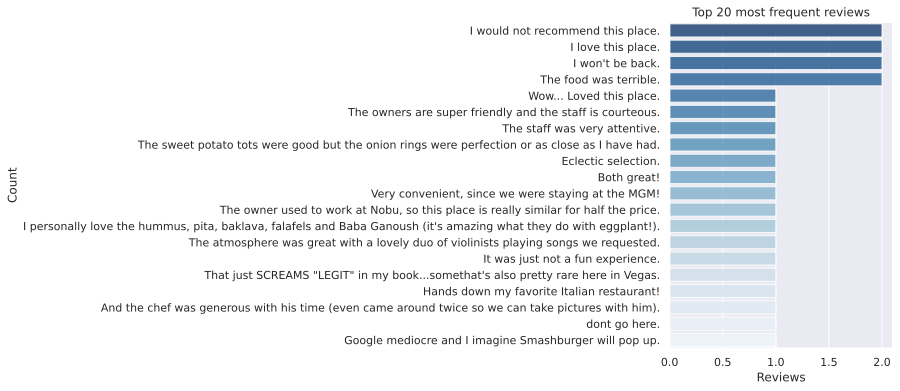

In [17]:
# Groups the top 20 reviews
x = df.Review.value_counts()[:20]
# Set the width and height of the figure
plt.figure(figsize=(4,6))
# Add title
plt.title("Top 20 most frequent reviews")
# Bar chart showing amount of both target values
sns.barplot(x, x.index, palette = "Blues_r", alpha = 0.80)
# Add label for vertical axis
plt.ylabel("Count")
# Add label for hotizontal axis
plt.xlabel("Reviews")
# Rotate the label text for hotizontal axis
plt.xticks(rotation=0)

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import itertools

all_words = []
for text in df.Review: 
    # Convert each review to string type 
    text = str(text).lower()
    # Split the review into its constituent words 
    words = text.split() 
    # Removing stopwords from the reviews
    words = [word for word in words if not word in set(stopwords.words('english'))]
    all_words.append(words)

all_words = list(itertools.chain.from_iterable(all_words))

values = pd.Series(all_words).value_counts()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

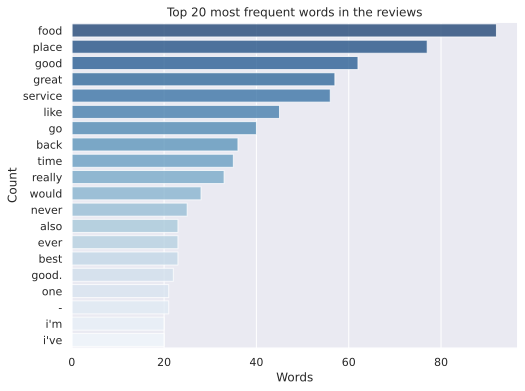

In [19]:
# Groups the top 20 words
x = values[:20]
# Set the width and height of the figure
plt.figure(figsize=(8,6))
# Add title
plt.title("Top 20 most frequent words in the reviews")
# Bar chart showing amount of both target values
sns.barplot( x, x.index, palette = "Blues_r", alpha = 0.75)
# Add label for vertical axis
plt.ylabel("Count")
# Add label for hotizontal axis
plt.xlabel("Words")
# Rotate the label text for hotizontal axis
plt.xticks(rotation=0)

In [20]:
# Function to create a Word Cloud

def create_word_cloud(text):
    """
    The purpose of this function is to create a Word Cloud from a Numpy array containing text.
    """    
    from wordcloud import WordCloud, STOPWORDS
    from PIL import Image

    STOPWORDS.add('NaN')  # remove NaN to the World Cloud
    STOPWORDS.add('https') # remove https to the World Cloud
    
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        # convert each val to string type 
        val = str(val)
        # split the value 
        tokens = val.split() 
        # Converts each token to lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '
            
    wordcloud = WordCloud(width = 3000, height = 2000,
                    background_color ='white',
                    #mask = maskArray,      
                    stopwords = stopwords,
                    min_font_size = 10)
    wordcloud.generate(comment_words)   
    
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()   

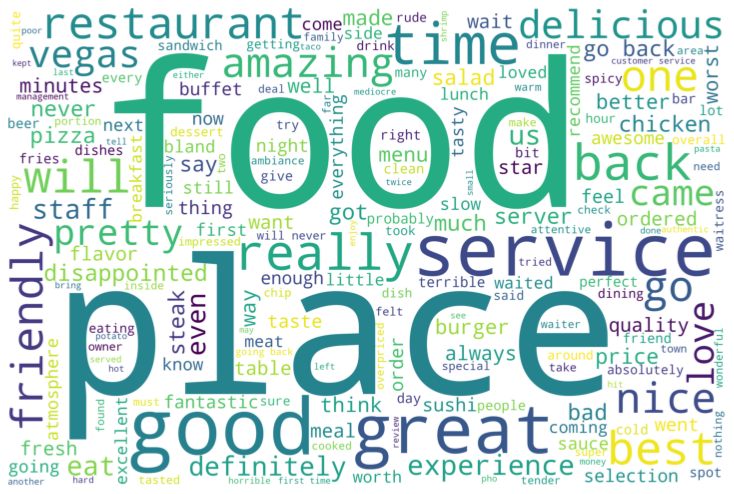

In [21]:
# Create a WordCloud from Reviews
text = df.Review.values
create_word_cloud(text)

#### **6.3 Data Preparation**
The text was cleaned and  prepared for the subsequent modeling.

In [22]:
# Libraries importation
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
# Dictionary of abbreviations
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [24]:
# Function for converting abbreviations to text
def convert_abbrev(text):
    """
    This function converts common English abbreviations to full text.
    """
    tokens = word_tokenize(text)
    tokens = [(abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word) for word in tokens]
    text = ' '.join(tokens)

    return text

In [25]:
# Fcuntion to clean and stem text
def prepare_text(text):
    """
    This function keeps only text characters, transforms text into lower case, splits the text into words using lists, 
    stems the words, removes the stop words and rejoin the words into a text string.
    """
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    
    return text

In [26]:
# Data preparation
df['prepText'] = df['Review'].apply(lambda x: convert_abbrev(x)) # First, abbreviations are converted to text
df['prepText'] = df['prepText'].apply(lambda x: prepare_text(x)) # Then, text is cleaned, stemmed, and stopwords are removed
df['prepText'].head()

0                                       wow love place
1                                           crust good
2                                   tasti textur nasti
3    stop late may bank holiday rick steve recommen...
4                              select menu great price
Name: prepText, dtype: object

#### **6.4 Data Modeling**
A bag-of-words model was created in order to train several binary classification algorithms for classificating the restaurant reviews into positive or negative. The hyperparameters for each model were tunned using GridSearchCV or RandomizedSearchCV. Then, the accuracy metric was used to select the best classification model.

In [27]:
# Creation of the Bag-of-Words Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(df['prepText'].values).toarray()
y = df.iloc[:, 1].values

In [28]:
# Taking a look into the Bag-of-Words Model
X[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
from sklearn.model_selection import train_test_split

# Division of the data set into training/validation set and testing set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

# Division of the training/validation set into training set and validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train_val, y_train_val, test_size = 0.15, random_state = 0)

In [30]:
# Models Importation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [31]:
# Metrics Importation
from sklearn.metrics import ( 
                            accuracy_score, 
                            precision_score, 
                            recall_score, 
                            f1_score, 
                            confusion_matrix,
                            classification_report, 
                            roc_auc_score,
                            plot_roc_curve,    
                            mean_squared_error)

In [47]:
# Function to plot Confusion Matrix

def plot_confusion_matrix(y_true, y_predict, title = 'Confusion Matrix'):
    "The purpose of this function is to plot the confusion matrix in a more aesthetic way."
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_predict)
    cm = cm.transpose()
    plt.subplots(figsize = (4,3.5))
    ax = sns.heatmap(cm, annot=True, cmap = "Blues")
    fontcolor = 'dimgray' # Set font color
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=11, colors = fontcolor)
    plt.xlabel('Predicted Conditions', fontweight = 'bold', color = fontcolor)
    plt.ylabel('True Conditions', fontweight = 'bold', color = fontcolor)
    plt.title(title, fontweight = 'bold', color = fontcolor)
    plt.xticks([0.5,1.5], ['Positive (PP)', 'Negative (PN)'], fontsize = 12, color = fontcolor)
    plt.yticks([0.5,1.5], ['Positive (P)', 'Negative (N)'], fontsize = 12, color = fontcolor)
    plt.show()

In [33]:
# Logistic Regression Model
%%time

logreg_classifier = LogisticRegression(random_state = 0)

logreg_param_grid = {'penalty': ['l1', 'l2', 'elasticnet', None],
                    'C': [1, 10, 100, 1000],
                    'tol': [1e-4, 1e-5, 1e-6],
                    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']                     
                    }

logreg_search = GridSearchCV(estimator = logreg_classifier,
                               param_grid = logreg_param_grid,
                               scoring = 'accuracy', # 'roc_auc'
                               cv = 5,
                               n_jobs = -1,                                                         
                               refit = True, 
                               verbose = True,
                               )

logreg_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1020 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solv

CPU times: user 4.88 s, sys: 289 ms, total: 5.17 s
Wall time: 3min 45s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': [0.0001, 1e-05, 1e-06]},
             scoring='accuracy', verbose=True)

Model: LogisticRegression(random_state=0)


The best parameters are: {'C': 10, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}



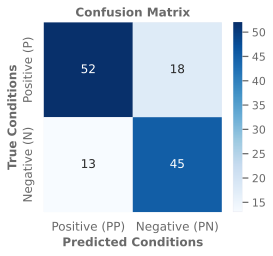

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        65
           1       0.78      0.71      0.74        63

    accuracy                           0.76       128
   macro avg       0.76      0.76      0.76       128
weighted avg       0.76      0.76      0.76       128

------------------------------

The best model yields an Accuracy of: 0.76316

The area under the ROC curve is: 0.75714

The RMSE is: 0.49213



In [48]:
# Logistic Regression Results

logreg_best_accuracy = logreg_search.best_score_

logreg_best_parameters = logreg_search.best_params_

logreg_y_pred = logreg_search.predict(X_validation)

logreg_roc_auc = roc_auc_score(y_validation, logreg_y_pred)

logreg_rmse = np.sqrt(mean_squared_error(y_validation, logreg_y_pred))

print(f"Model: {logreg_search.estimator}\n\n")
print(f"The best parameters are: {logreg_best_parameters}\n")
plot_confusion_matrix(y_validation, logreg_y_pred)
print(classification_report(y_validation, logreg_y_pred))
print('-'*30)
print(f"\nThe best model yields an Accuracy of: {logreg_best_accuracy:.05f}\n")
print(f"The area under the ROC curve is: {logreg_roc_auc:.05f}\n")
print(f"The RMSE is: {logreg_rmse:.05f}\n")

In [35]:
# K-Nearest Neighbors Model
%%time

KNN_classifier = KNeighborsClassifier()

KNN_param_grid = {'n_neighbors': list(range(3,50)),
                  'weights' : ['uniform','distance'],
                  'metric' : ['minkowski','euclidean','manhattan']                                   
                  }

KNN_search = GridSearchCV(estimator = KNN_classifier,
                          param_grid = KNN_param_grid,
                          scoring = 'accuracy', # 'roc_auc'
                          cv = 5,
                          n_jobs = -1,                                                         
                          refit = True, 
                          verbose = True,
                          )

KNN_search.fit(X_train, y_train)

Fitting 5 folds for each of 282 candidates, totalling 1410 fits
CPU times: user 1.47 s, sys: 105 ms, total: 1.58 s
Wall time: 54.1 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=True)

Model: KNeighborsClassifier()


The best parameters are: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}



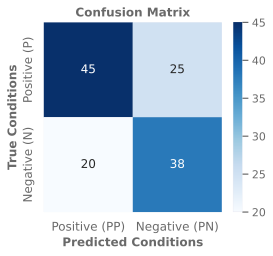

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        65
           1       0.66      0.60      0.63        63

    accuracy                           0.65       128
   macro avg       0.65      0.65      0.65       128
weighted avg       0.65      0.65      0.65       128

------------------------------

The best model yields an Accuracy of: 0.70914

The area under the ROC curve is: 0.64774

The RMSE is: 0.59293



In [49]:
# K-Nearest Neighbors Results
KNN_best_accuracy = KNN_search.best_score_

KNN_best_parameters = KNN_search.best_params_

KNN_y_pred = KNN_search.predict(X_validation)

KNN_roc_auc = roc_auc_score(y_validation, KNN_y_pred)

KNN_rmse = np.sqrt(mean_squared_error(y_validation, KNN_y_pred))

print(f"Model: {KNN_search.estimator}\n\n")
print(f"The best parameters are: {KNN_best_parameters}\n")
plot_confusion_matrix(y_validation, KNN_y_pred)
print(classification_report(y_validation, KNN_y_pred))
print('-'*30)
print(f"\nThe best model yields an Accuracy of: {KNN_best_accuracy:.05f}\n")
print(f"The area under the ROC curve is: {KNN_roc_auc:.05f}\n")
print(f"The RMSE is: {KNN_rmse:.05f}\n")

In [37]:
# Support Vector Machine Model
%%time

SVC_classifier = SVC(random_state = 0)

SVC_param_grid = {'C': [0.1,1, 10, 100], 
                  'gamma': [1,0.1,0.01,0.001],
                  'kernel': ['rbf', 'poly', 'sigmoid']}

# RandomizedSearchCV was used beacause SVC is very computationally expensive
SVC_search = RandomizedSearchCV(estimator = SVC_classifier,
                                param_distributions = SVC_param_grid,
                                scoring = 'accuracy', # 'roc_auc'
                                cv = 5, 
                                n_jobs = -1,                                                                                
                                refit = True, 
                                verbose = True,
                                random_state = 0, 
                                n_iter = 50, # Number of samples
                              )

SVC_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: user 1.53 s, sys: 115 ms, total: 1.65 s
Wall time: 1min 13s


RandomizedSearchCV(cv=5, estimator=SVC(random_state=0), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   random_state=0, scoring='accuracy', verbose=True)

Model: SVC(random_state=0)


The best parameters are: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}



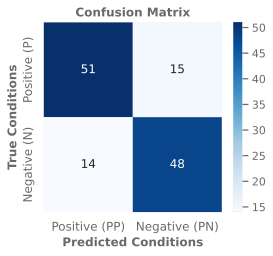

              precision    recall  f1-score   support

           0       0.77      0.78      0.78        65
           1       0.77      0.76      0.77        63

    accuracy                           0.77       128
   macro avg       0.77      0.77      0.77       128
weighted avg       0.77      0.77      0.77       128

------------------------------

The best model yields an Accuracy of: 0.77424

The area under the ROC curve is: 0.77326

The RMSE is: 0.47599



In [50]:
# Support Vector Machine Results
SVC_best_accuracy = SVC_search.best_score_

SVC_best_parameters = SVC_search.best_params_

SVC_y_pred = SVC_search.predict(X_validation)

SVC_roc_auc = roc_auc_score(y_validation, SVC_y_pred)

SVC_rmse = np.sqrt(mean_squared_error(y_validation, SVC_y_pred))

print(f"Model: {SVC_search.estimator}\n\n")
print(f"The best parameters are: {SVC_best_parameters}\n")
plot_confusion_matrix(y_validation, SVC_y_pred)
print(classification_report(y_validation, SVC_y_pred))
print('-'*30)
print(f"\nThe best model yields an Accuracy of: {SVC_best_accuracy:.05f}\n")
print(f"The area under the ROC curve is: {SVC_roc_auc:.05f}\n")
print(f"The RMSE is: {SVC_rmse:.05f}\n")

In [39]:
# Naive Bayes Model
%%time

Bayes_classifier = GaussianNB()

Bayes_param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

Bayes_search = GridSearchCV(estimator = Bayes_classifier,
                          param_grid = Bayes_param_grid,
                          scoring = 'accuracy', # 'roc_auc'
                          cv = 5,
                          n_jobs = -1,                                                         
                          refit = True, 
                          verbose = True,
                          )

Bayes_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 490 ms, sys: 40.4 ms, total: 530 ms
Wall time: 14 s


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=True)

Model: GaussianNB()


The best parameters are: {'var_smoothing': 0.1}



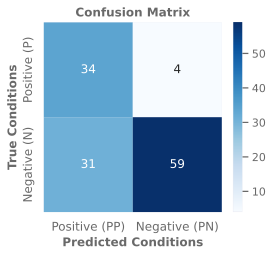

              precision    recall  f1-score   support

           0       0.89      0.52      0.66        65
           1       0.66      0.94      0.77        63

    accuracy                           0.73       128
   macro avg       0.78      0.73      0.72       128
weighted avg       0.78      0.73      0.71       128

------------------------------

The best model yields an Accuracy of: 0.72992

The area under the ROC curve is: 0.72979

The RMSE is: 0.52291



In [51]:
# Naive Bayes Result
Bayes_best_accuracy = Bayes_search.best_score_

Bayes_best_parameters = Bayes_search.best_params_

Bayes_y_pred = Bayes_search.predict(X_validation)

Bayes_roc_auc = roc_auc_score(y_validation, Bayes_y_pred)

Bayes_rmse = np.sqrt(mean_squared_error(y_validation, Bayes_y_pred))

print(f"Model: {Bayes_search.estimator}\n\n")
print(f"The best parameters are: {Bayes_best_parameters}\n")
plot_confusion_matrix(y_validation, Bayes_y_pred)
print(classification_report(y_validation, Bayes_y_pred))
print('-'*30)
print(f"\nThe best model yields an Accuracy of: {Bayes_best_accuracy:.05f}\n")
print(f"The area under the ROC curve is: {Bayes_roc_auc:.05f}\n")
print(f"The RMSE is: {Bayes_rmse:.05f}\n")

In [41]:
# Decision Tree Model
%%time

tree_classifier = DecisionTreeClassifier(random_state = 0)

tree_param_grid = {
                  'criterion': ['gini', 'entropy', 'log_loss'],
                  'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150, None],
                   'max_features': ['sqrt', 'log2', None]
                   }

tree_search = GridSearchCV(estimator = tree_classifier,
                          param_grid = tree_param_grid,
                          scoring = 'accuracy', # 'roc_auc'
                          cv = 5,
                          n_jobs = -1,                                                         
                          refit = True, 
                          verbose = True,
                          )

tree_search.fit(X_train, y_train)

Fitting 5 folds for each of 171 candidates, totalling 855 fits
CPU times: user 725 ms, sys: 53.6 ms, total: 778 ms
Wall time: 14.9 s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
285 fits failed out of a total of 855.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
285 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFai

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150, None],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy', verbose=True)

Model: DecisionTreeClassifier(random_state=0)


The best parameters are: {'criterion': 'gini', 'max_depth': 15, 'max_features': None}



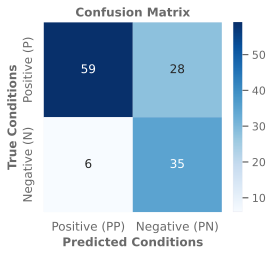

              precision    recall  f1-score   support

           0       0.68      0.91      0.78        65
           1       0.85      0.56      0.67        63

    accuracy                           0.73       128
   macro avg       0.77      0.73      0.72       128
weighted avg       0.76      0.73      0.73       128

------------------------------

The best model yields an Accuracy of: 0.73962

The area under the ROC curve is: 0.73162

The RMSE is: 0.51539



In [52]:
# Decision Tree Results
tree_best_accuracy = tree_search.best_score_

tree_best_parameters = tree_search.best_params_

tree_y_pred = tree_search.predict(X_validation)

tree_roc_auc = roc_auc_score(y_validation, tree_y_pred)

tree_rmse = np.sqrt(mean_squared_error(y_validation, tree_y_pred))

print(f"Model: {tree_search.estimator}\n\n")
print(f"The best parameters are: {tree_best_parameters}\n")
plot_confusion_matrix(y_validation, tree_y_pred)
print(classification_report(y_validation, tree_y_pred))
print('-'*30)
print(f"\nThe best model yields an Accuracy of: {tree_best_accuracy:.05f}\n")
print(f"The area under the ROC curve is: {tree_roc_auc:.05f}\n")
print(f"The RMSE is: {tree_rmse:.05f}\n")

In [45]:
# Random Forest Model
%%time

forest_classifier = RandomForestClassifier(random_state = 0)

forest_param_grid = {
                    'n_estimators': [100, 300, 500, 1000],
                    'criterion': ['gini', 'entropy', 'log_loss'],
                    'max_depth' : [1, 5, 10, 20],
                    'max_features': ['sqrt', 'log2', None]
                    }

forest_search = GridSearchCV(estimator = forest_classifier,
                            param_grid = forest_param_grid,
                            scoring = 'accuracy', # 'roc_auc'
                            cv = 3, # Only 3 folds because RF are computationally expensive
                            n_jobs = -1,                                                         
                            refit = True, 
                            verbose = True,
                            )

forest_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
144 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

CPU times: user 7.37 s, sys: 648 ms, total: 8.02 s
Wall time: 12min 33s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 300, 500, 1000]},
             scoring='accuracy', verbose=True)

Model: RandomForestClassifier(random_state=0)


The best parameters are: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 1000}



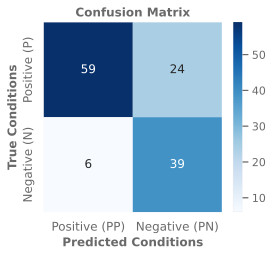

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        65
           1       0.87      0.62      0.72        63

    accuracy                           0.77       128
   macro avg       0.79      0.76      0.76       128
weighted avg       0.79      0.77      0.76       128

------------------------------

The best model yields an Accuracy of: 0.77286

The area under the ROC curve is: 0.76337

The RMSE is: 0.48412



In [53]:
# Random Forest Results
forest_best_accuracy = forest_search.best_score_

forest_best_parameters = forest_search.best_params_

forest_y_pred = forest_search.predict(X_validation)

forest_roc_auc = roc_auc_score(y_validation, forest_y_pred)

forest_rmse = np.sqrt(mean_squared_error(y_validation, forest_y_pred))

print(f"Model: {forest_search.estimator}\n\n")
print(f"The best parameters are: {forest_best_parameters}\n")
plot_confusion_matrix(y_validation, forest_y_pred)
print(classification_report(y_validation, forest_y_pred))
print('-'*30)
print(f"\nThe best model yields an Accuracy of: {forest_best_accuracy:.05f}\n")
print(f"The area under the ROC curve is: {forest_roc_auc:.05f}\n")
print(f"The RMSE is: {forest_rmse:.05f}\n")

In [55]:
# XGBoost Model
%%time

xgb_classifier = XGBClassifier(objective= 'binary:logistic', random_state = 0)

xgb_param_grid = {
                    'n_estimators':[100, 300, 500],
                    'max_depth' : [1, 5, 10],                    
                    'learning_rate': [0.1, 0.01, 0.001]
                    }

# RandomizedSearchCV was used because XGB is somewhat computationally expensive
xgb_search = RandomizedSearchCV(estimator = xgb_classifier,
                                param_distributions = xgb_param_grid,
                                scoring = 'accuracy', # 'roc_auc'
                                cv = 3,
                                n_jobs = -1,                                                         
                                refit = True, 
                                verbose = True,
                                random_state = 0,
                                n_iter = 40
                                )

xgb_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 27 is smaller than n_iter=40. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: user 24.5 s, sys: 396 ms, total: 24.9 s
Wall time: 9min 45s


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [1, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=0, scoring='accuracy', verbose=True)

Model: XGBClassifier()


The best parameters are: {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.01}



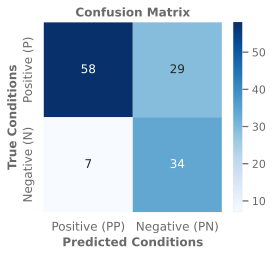

              precision    recall  f1-score   support

           0       0.67      0.89      0.76        65
           1       0.83      0.54      0.65        63

    accuracy                           0.72       128
   macro avg       0.75      0.72      0.71       128
weighted avg       0.75      0.72      0.71       128

------------------------------

The best model yields an Accuracy of: 0.72992

The area under the ROC curve is: 0.71600

The RMSE is: 0.53033



In [56]:
# XGBoost Results
xgb_best_accuracy = xgb_search.best_score_

xgb_best_parameters = xgb_search.best_params_

xgb_y_pred = xgb_search.predict(X_validation)

xgb_roc_auc = roc_auc_score(y_validation, xgb_y_pred)

xgb_rmse = np.sqrt(mean_squared_error(y_validation, xgb_y_pred))

print(f"Model: {xgb_search.estimator}\n\n")
print(f"The best parameters are: {xgb_best_parameters}\n")
plot_confusion_matrix(y_validation, xgb_y_pred)
print(classification_report(y_validation, xgb_y_pred))
print('-'*30)
print(f"\nThe best model yields an Accuracy of: {xgb_best_accuracy:.05f}\n")
print(f"The area under the ROC curve is: {xgb_roc_auc:.05f}\n")
print(f"The RMSE is: {xgb_rmse:.05f}\n")

#### **6.5 Evaluation**
The diferent fitted models were evaluated by using the testing set and primarily the following metrics: 
* Accuracy, 
* AUC ROC, and
* RMSE. 

Moreover, confusion matrices, classification reports, AUC ROC plots, precision, negative predictive value (NPV), sensitivity, specificity, and the F1 score were also used to assess the performance of each model.

In [57]:
# Models Testing
models_df = pd.DataFrame([['Dummy', 'Dummy', 'Dummy', 'Dummy', 'Dummy', 'Dummy', 'Dummy', 'Dummy', 'Dummy']], 
                         columns = ['Model', 'Accuracy', 'AUC', 'RMSE', 'Precision', 'NPV','Sensitivity', 'Specificity', 'F1'])

models = [logreg_search, KNN_search, SVC_search, Bayes_search, tree_search, forest_search, xgb_search]

for model in models:
    y_pred_model = model.predict(X_test)
    #y_pred_prob_model = model.predict_proba(X_test)[:,1]
    model_accuracy = accuracy_score(y_test, y_pred_model)
    model_auc = roc_auc_score(y_test, y_pred_model)
    model_rmse = np.sqrt(mean_squared_error(y_test, y_pred_model))
    model_precision = precision_score(y_test, y_pred_model) # Positive predictive value
    model_npv = precision_score(y_test, y_pred_model, pos_label=0) # Negative predictive value
    #tn, fp, fn, tp = confusion_matrix(y_test, y_pred_model).ravel()
    #model_npv = tn/(tn + fn) # Negative predictive value
    model_sensitivity = recall_score(y_test, y_pred_model) # Recall of the positive class
    model_specificity = recall_score(y_test, y_pred_model, pos_label=0) # Recall of the negative class
    model_f1 = f1_score(y_test, y_pred_model) 
    models_df = pd.concat([models_df, 
                          pd.DataFrame({'Model': str(model)[:80], 'Accuracy': round(model_accuracy, 5),'AUC': round(model_auc, 5), 
                                        'RMSE': round(model_rmse, 5), 'Precision': round(model_precision, 5), 'NPV': round(model_npv, 5), 
                                        'Sensitivity': round(model_sensitivity, 5), 'Specificity': round(model_specificity, 5), 
                                        'F1': round(model_f1, 5)}, index=[0])], axis = 0)

models_df = models_df.iloc[1:,].reset_index().drop(columns = 'index')
models_df

,Model,Accuracy,AUC,RMSE,Precision,NPV,Sensitivity,Specificity,F1
0,"GridSearchCV(cv=5, estimator=LogisticRegressio...",0.71333,0.71572,0.53541,0.75714,0.675,0.67089,0.76056,0.71141
1,"GridSearchCV(cv=5, estimator=KNeighborsClassif...",0.66667,0.67142,0.57735,0.73016,0.62069,0.58228,0.76056,0.64789
2,"RandomizedSearchCV(cv=5, estimator=SVC(random_...",0.73333,0.73614,0.5164,0.78261,0.69136,0.68354,0.78873,0.72973
3,"GridSearchCV(cv=5, estimator=GaussianNB(), n_j...",0.67333,0.66349,0.57155,0.64423,0.73913,0.8481,0.47887,0.73224
4,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",0.68667,0.70039,0.55976,0.92105,0.60714,0.44304,0.95775,0.59829
5,"GridSearchCV(cv=3, estimator=RandomForestClass...",0.74667,0.7545,0.50332,0.87273,0.67368,0.60759,0.90141,0.71642
6,"RandomizedSearchCV(cv=3, estimator=XGBClassifi...",0.69333,0.7053,0.55377,0.88372,0.61682,0.48101,0.92958,0.62295


In [58]:
# Cleaning of the Models column by removing unnecessary characters from model name
import re
models_df['Model'] = models_df['Model'].map(lambda x: re.findall(r'estimator=(.*)\(', x)[0])
models_df

,Model,Accuracy,AUC,RMSE,Precision,NPV,Sensitivity,Specificity,F1
0,LogisticRegression,0.71333,0.71572,0.53541,0.75714,0.675,0.67089,0.76056,0.71141
1,KNeighborsClassifier,0.66667,0.67142,0.57735,0.73016,0.62069,0.58228,0.76056,0.64789
2,SVC,0.73333,0.73614,0.5164,0.78261,0.69136,0.68354,0.78873,0.72973
3,GaussianNB,0.67333,0.66349,0.57155,0.64423,0.73913,0.8481,0.47887,0.73224
4,DecisionTreeClassifier,0.68667,0.70039,0.55976,0.92105,0.60714,0.44304,0.95775,0.59829
5,RandomForestClassifier,0.74667,0.7545,0.50332,0.87273,0.67368,0.60759,0.90141,0.71642
6,XGBClassifier,0.69333,0.7053,0.55377,0.88372,0.61682,0.48101,0.92958,0.62295


In [59]:
models_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Model        7 non-null      object
 1   Accuracy     7 non-null      object
 2   AUC          7 non-null      object
 3   RMSE         7 non-null      object
 4   Precision    7 non-null      object
 5   NPV          7 non-null      object
 6   Sensitivity  7 non-null      object
 7   Specificity  7 non-null      object
 8   F1           7 non-null      object
dtypes: object(9)
memory usage: 632.0+ bytes


In [60]:
models_df.to_csv('Models_Evaluation_Metrics.csv', index = False)

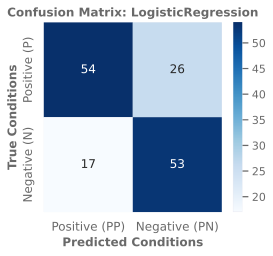

None


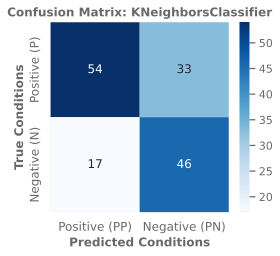

None


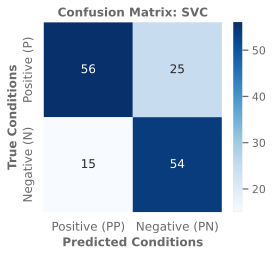

None


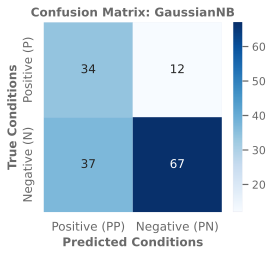

None


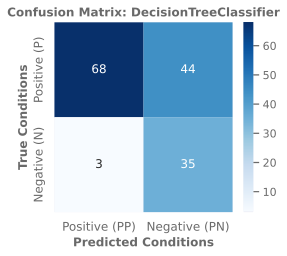

None


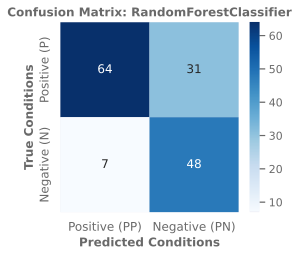

None


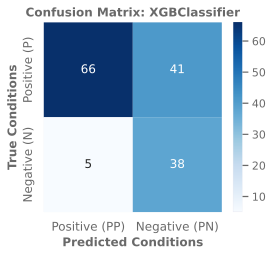

None


In [61]:
# Confusion matrix for each model
for i, model in enumerate(models):
    y_pred_model = model.predict(X_test) 
    title = models_df['Model'].iloc[i]
    print(plot_confusion_matrix(y_test, y_pred_model, title = f'Confusion Matrix: {title}'))

From the confusion matrices above, it seems that **SVC** and **Random Forests** are the algorithms with the best performance, as they have the largest numbers of True Positives and True Negatives, as well as the lowest numbers of False Positives and False Negatives.

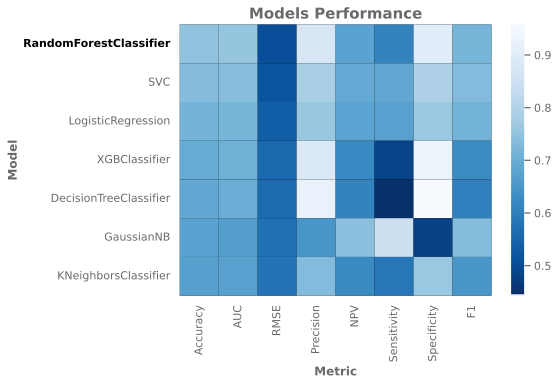

In [62]:
# Heatmap of the Evaluation Metrics
plt.figure(figsize = (7,5))
ax = sns.heatmap(data = models_df.set_index('Model').sort_values('Accuracy', ascending = False).astype(float), 
                  cmap = "Blues_r",
                  mask = (models_df.set_index('Model').sort_values('Accuracy', ascending = False).astype(float) == 0))
ax.set_facecolor('xkcd:black')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11, colors = 'dimgray')
plt.xlabel('Metric', weight = 'bold', fontsize = 12, color = 'dimgray')
plt.ylabel('Model', weight = 'bold', fontsize = 12, color = 'dimgray')
plt.title('Models Performance', weight = 'bold', fontsize = 15, color = 'dimgray')
plt.xticks(fontsize = 11, color = 'dimgray')
plt.yticks(fontsize = 11, color = 'dimgray')
plt.gca().get_yticklabels()[0].set_fontweight("bold")
plt.gca().get_yticklabels()[0].set_color("black")
plt.show()

From the heatmap above, **Random Forests, SVC and Logistic** are the algorithms with the best performance according to the **accuracy, AUC ROC and RMSE metrics**. They exhibited the highest accuracy and AUC ROC, as well as the lowest RMSE.

On the contrary, regarding the validity of the predictions, the best **precision** or **positive predictive value** corresponds to the **XGBoost and Decision Trees** algorithms. This means that their rate of accurate positive predictions is the highest or, in other words, they had the best ability to not to label as positive a review that is negative. Whereas the **Naive Bayes** algorithm yielded the highest rate of accurate negative predictions (highest **negative predictive value**) or, in other words, it had the best ability to not to label as negative a review that is positive.

On the other hand, regarding the completeness of the predictions, the **Naive Bayes** algorithm also exhibited the highest **sensitivity**, which means that this algorithm has the best ability to correctly classify true positive reviews from all the positive reviews or, in other words, it had the best ability to find all the positive reviews. Whereas the **XGBoost and Decision Trees** algorithms had the best ability to classify true negative reviews from all the negative reviews or, in other words, they had the best ability to find all the negative reviews (best **specificity**).

Finally, according to the **F1-score**, which is the harmonic mean of precision and sensitivity, the best model is the **Naive Bayes** algorithm.

In [63]:
# Creation of a custom color palette
palette = ['dimgray',]*7
palette.insert(0, sns.color_palette('Blues_r')[0])

# Definition of the base font color for plots
base_font_color = 'dimgray'

# Definition of font properties for 
import matplotlib as mpl
fp = mpl.font_manager.FontProperties(
                                      family='impact', style='normal', size=12,
                                      weight='normal', stretch='normal')
# Importation of function formatter
from matplotlib.ticker import FuncFormatter

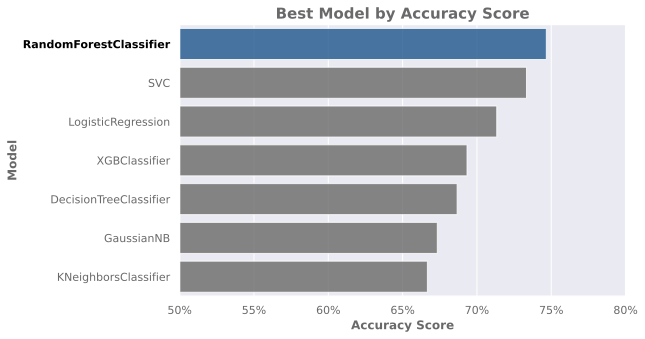

In [64]:
# Best model by accuracy score
plt.figure(figsize = (8, 5))
ax = sns.barplot(data = models_df.sort_values(by = 'Accuracy', ascending = False), y = 'Model', x = 'Accuracy', palette = palette, alpha = 0.8)
plt.title('Best Model by Accuracy Score', fontweight = 'bold', size = 15, color = base_font_color)
plt.xlabel('Accuracy Score', color = base_font_color, fontsize = 12, fontweight = 'bold')
plt.ylabel('Model', color = base_font_color, fontsize = 12, fontweight = 'bold')
plt.xticks(color = base_font_color)
plt.yticks(color = base_font_color)
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.xlim((0.5,0.8))
plt.gca().get_yticklabels()[0].set_fontweight("bold")
plt.gca().get_yticklabels()[0].set_color("black")
#plt.text(480, 278, 'Random Forest\nis the model with\nthe highest accuracy.', fontproperties=fp, transform=None)
plt.show()
plt.show()

Thus, in view of the above chart, the algorithm that yielded the **highest accuracy** was **Random Forest**.

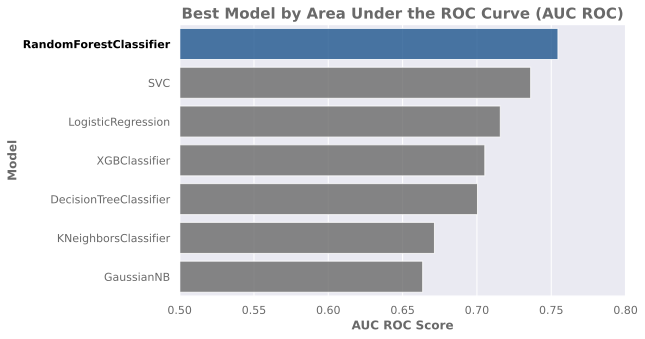

In [65]:
# Best model by AUC ROC score
plt.figure(figsize = (8, 5))
ax = sns.barplot(data = models_df.sort_values(by = 'AUC', ascending = False), y = 'Model', x = 'AUC', palette = palette, alpha = 0.8)
plt.title('Best Model by Area Under the ROC Curve (AUC ROC)', fontweight = 'bold', size = 15, color = base_font_color)
plt.xlabel('AUC ROC Score', color = base_font_color, fontsize = 12, fontweight = 'bold')
plt.ylabel('Model', color = base_font_color, fontsize = 12, fontweight = 'bold')
plt.xticks(color = base_font_color)
plt.yticks(color = base_font_color)
plt.xlim((0.5,0.8))
plt.gca().get_yticklabels()[0].set_fontweight("bold")
plt.gca().get_yticklabels()[0].set_color("black")
plt.show()

Thus, in view of the above chart, the algorithm that yielded the **highest AUC ROC** was **Random Forest**.

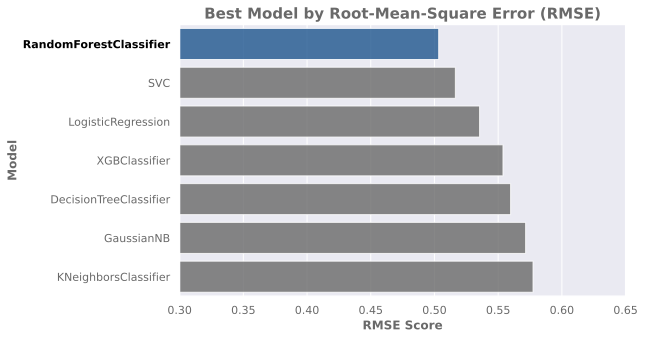

In [66]:
# Best model by RMSE score
plt.figure(figsize = (8, 5))
sns.barplot(data = models_df.sort_values(by = 'RMSE', ascending = True), y = 'Model', x = 'RMSE', palette = palette, alpha = 0.8)
plt.title('Best Model by Root-Mean-Square Error (RMSE)', fontweight = 'bold', size = 15, color = base_font_color)
plt.xlabel('RMSE Score', color = base_font_color, fontsize = 12, fontweight = 'bold')
plt.ylabel('Model', color = base_font_color, fontsize = 12, fontweight = 'bold')
plt.xticks(color = base_font_color)
plt.yticks(color = base_font_color)
plt.xlim((0.3,0.65))
plt.gca().get_yticklabels()[0].set_fontweight("bold")
plt.gca().get_yticklabels()[0].set_color("black")
plt.show()

Thus, in view of the above chart, the algorithm that yielded the **lowest RMSE** was **Random Forest**.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

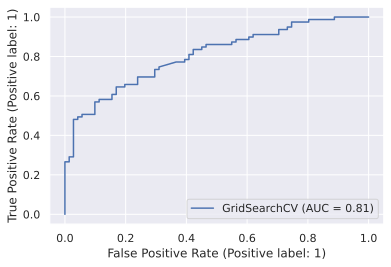

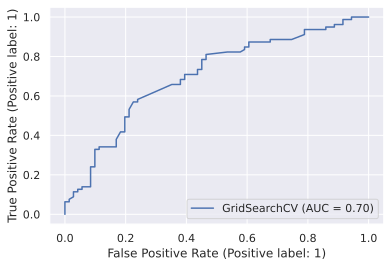

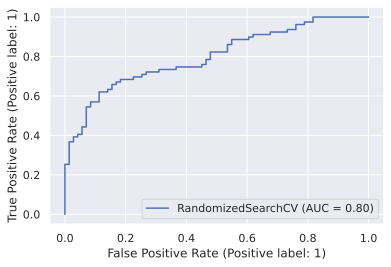

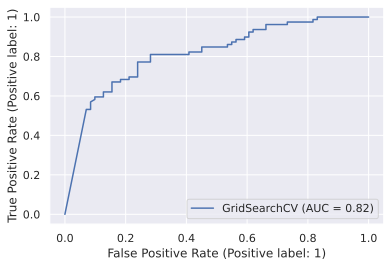

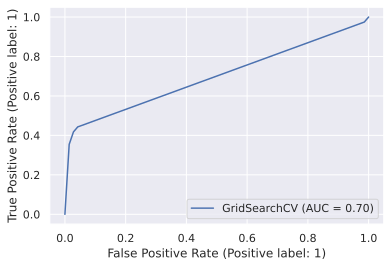

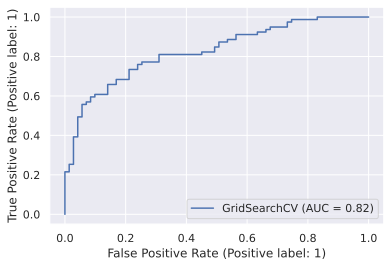

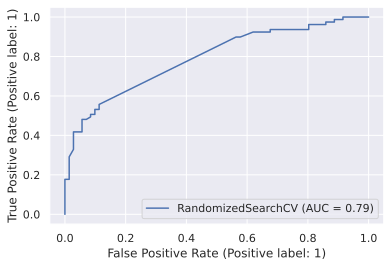

In [67]:
# ROC Curve Plot
logreg_c = plot_roc_curve(logreg_search,X_test,y_test)
KNN_c = plot_roc_curve(KNN_search, X_test,y_test)
SVC_c = plot_roc_curve(SVC_search, X_test,y_test)
Bayes_c = plot_roc_curve(Bayes_search,X_test,y_test)
tree_c = plot_roc_curve(tree_search, X_test,y_test)
forest_c = plot_roc_curve(forest_search, X_test,y_test)
xgb_c = plot_roc_curve(xgb_search,X_test,y_test)

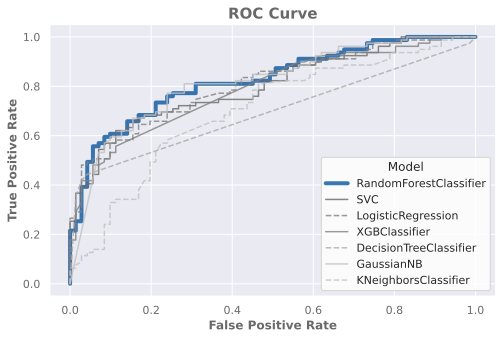

In [68]:
# Plotting all ROC curves in one single chart
plt.figure(figsize=(8,5))
ax = plt.gca()
forest_c.plot(ax=ax,alpha=0.8,label='RandomForestClassifier', linewidth = 4, color = sns.color_palette('Blues_r')[0])
SVC_c.plot(ax=ax,alpha=0.8,label='SVC', color = 'dimgray')
logreg_c.plot(ax=ax,alpha=0.8,label='LogisticRegression', color = 'gray', linestyle = '--')
xgb_c.plot(ax=ax,alpha=0.8,label='XGBClassifier', color = 'grey')
tree_c.plot(ax=ax,alpha=0.8,label='DecisionTreeClassifier', color = 'darkgray', linestyle = '--')
Bayes_c.plot(ax=ax,alpha=0.8,label='GaussianNB', color = 'silver')
KNN_c.plot(ax=ax,alpha=0.8,label='KNeighborsClassifier', color = 'silver', linestyle = '--')
sns.move_legend(ax, loc = 'lower right', facecolor = 'white', title = 'Model')
plt.title('ROC Curve', fontweight = 'bold', size = 15, color = base_font_color)
plt.xlabel('False Positive Rate', color = base_font_color, fontsize = 12, fontweight = 'bold')
plt.ylabel('True Positive Rate', color = base_font_color, fontsize = 12, fontweight = 'bold')
plt.xticks(color = base_font_color)
plt.yticks(color = base_font_color)
plt.show()

Finally, according the ROC curves, the algorithm that yielded the best results was **Random Forest** as its curve is arguably the closest to the y-axis, which means that this algorithm is capable to yield the highest true positive rate. On the other hand, it seems that the K-Neighbors was the worst algorithm as it is the closest to the x-axis, which represents the false positive rate.

### **7. Conclusions**
According to the combination of parameters tested, the **best model** for **classifying the reviews of a restaurant into positive or negative** through Natural Language Processing based on a bag-of-words model was the **Random Forest Classifier**, with an accuracy, AUC ROC, and RMSE of 0.75, 0.76, and 0.50, respectively. 

It is notable that this finding was in a contrary direction from what it is stated in the literature. This may suggest that either the Random Forest algorithms have been improved in the last couple of years or that the parameters used in the other algorithms were not adequate for the present classification task.

On the other hand, the second and third best models were **SVC** and **Logistic Regression**, according with the accuracy, AUC ROC, and RMSE metrics. This raises an apparent contradiction as the SVC model with the best performance used the radial basis function, which suggests that the classification problem is not linearly separable. 

In this context, as future research perspectives, further hyperparameter tunning is suggested on the Random Forest Classifier, SVC, and Logistic Regression algorithms, in order to find out whether the classification problem is linearly separable or not, as well as to reach a greater accuracy and a lower error. 

___

### **8. References**
* **Müller, A. C. & Guido, S. (2016)**. *Introduction to Machine Learning with Python: A Guide for Data Scientists*. O'Reilly Media. 
* **Ponteves, H. & Ermenko, K. (2021).** *Machine Learning de la A a la Z*. https://joanby.github.io/bookdown-mlaz/
* **Rogel-Salazar, J. (2020)**. *Advanced Data Science and Analytics with Python*. Chapman & Hall/CRC.
* **Rollins, J. B. (2015)**. *Metodología Fundamental para la Ciencia de Datos. Somers: IBM Corporation.* https://www.ibm.com/downloads/cas/WKK9DX51

In [69]:
# End